# ACTIVE HOUSE REPS

## Exploring the Active_House_Reps_Contributions2010-2020.csv

In [45]:
import pandas as pd

# Provide the file path
file_path = 'Active_House_Reps_Contributions2010-2020.csv'

# Read the Excel file into a Pandas DataFrame
df = pd.read_csv(file_path)
df.head()

,Address,Amount,CPF ID,City,City Names,Contributor,County Names,Date,Datetime,Employer,...,Record Type Description,Record Type ID,Source Description,State,Tender Type Description,Tender Type ID,UUID,Zip,Zip Codes,Matching Names
0,63 Holden Street,70.0,16045,New Bedford,New Bedford,"Cotter, Christopher",Bristol County,8/19/2015,2015-08-19,City of New Bedford,...,Individual,201,8/19/15 Deposit Report,MA,Check,1,f2c79c4a-f333-57e5-817d-266eaa600e34,02740,2740.0,Ian Abreu
1,86 Campbell St,100.0,16045,New Bedford,New Bedford,"Fernandes, Joshua",Bristol County,9/29/2015,2015-09-29,New Bedford Police Dept.,...,Individual,201,9/29/15 Deposit Report,MA,Check,1,1c85246b-8b52-5dde-b2c2-a15c6c2bb07b,02740,2740.0,Ian Abreu
2,36 Barker St,100.0,16045,North Dartmouth,North Dartmouth,"Taveira, Carlos",Bristol County,10/28/2016,2016-10-28,City of New Bedford,...,Individual,201,10/28/16 Deposit Report,MA,Check,1,9b24ea0b-b22f-5ea5-bba4-e8f6e2293106,02747,2747.0,Ian Abreu
3,61 Durfee St,100.0,16045,New Bedford,New Bedford,"Hogan, Timothy",Bristol County,10/30/2016,2016-10-30,City of New Bedford,...,Individual,201,10/30/16 Deposit Report,MA,Check,1,d8d72684-9cc5-5a8e-aa1e-28f9799a63e6,02740,2740.0,Ian Abreu
4,61 Durfee Street,60.0,16045,New Bedford,New Bedford,"Hogan, Timothy",Bristol County,5/8/2017,2017-05-08,City of New Bedford,...,Individual,201,5/8/17 Deposit Report,MA,Check,1,b7d3aa4d-f3b2-5143-b346-82ded728c852,02740,2740.0,Ian Abreu


#### Finding the top 10 recipients based on how much money they have recieved

In [46]:
# Group the data by 'Matching Names' and sum the 'Amount' for each name
name_recipients = df.groupby('Matching Names')['Amount'].sum()
top_10_names_rec = name_recipients.sort_values(ascending=False).head(10)

# Display the top 10 names who have received the most contributions
print(top_10_names_rec)

Matching Names
Timothy Whelan      30750.00
Robert DeLeo        25275.00
Rob Consalvo        14500.00
Harold Naughton     11132.73
William Lantigua    10885.00
Daniel Hunt         10310.00
Brian Dempsey        9700.00
Jr. Puppolo          8500.00
Edward Coppinger     8350.00
Adrian Madaro        6950.00
Name: Amount, dtype: float64


#### Finding the top 10 contributors based on how much money they have contributed

In [47]:
name_contributors = df.groupby('Contributor')['Amount'].sum()
top_10_names_con = name_contributors.sort_values(ascending=False).head(10)

# Display the top 10 names who have the most contributions
print(top_10_names_con)

Contributor
Daly, Andrew          8850.0
Hunter, Edward        8475.0
Pullman, Dana         7225.0
Babbin, Timothy       5475.0
Young, Joseph         4000.0
Pudolsky, Gerald C    4000.0
Cummings, James       3700.0
Machado, James M.     3325.0
Martin, James         2975.0
Neal, David           2950.0
Name: Amount, dtype: float64


#### Finding the occupation of the top 10 contributors

In [48]:
top_10_contributors = top_10_names_con.index

# Create a new DataFrame containing only the top 10 contributors
top_10_contributors_df = df[df['Contributor'].isin(top_10_contributors)][['Contributor', 'Occupation']]
top_10_contributors_df = top_10_contributors_df.drop_duplicates(subset='Contributor')

# Display the top 10 contributors and their respective occupations
print(top_10_contributors_df)

             Contributor            Occupation
27          Daly, Andrew    Treasurer/Director
28        Hunter, Edward     Board of Director
29         Pullman, Dana             President
128        Young, Joseph             Detective
181      Cummings, James               Sheriff
196    Machado, James M.     Legislative Agent
304      Babbin, Timothy               Trooper
504        Martin, James  State Police Officer
604          Neal, David        Deputy Sheriff
1218  Pudolsky, Gerald C       Special Sheriff


#### Top 20 occupations based on amount contributed

In [50]:
df['Occupation'] = df['Occupation'].str.lower()

# Group the data by 'Occupation' and sum the 'Amount' for each occupation
occupation_contributions = df.groupby('Occupation')['Amount'].sum()

# Sort the resulting series and take the top 20
top_20_occupations = occupation_contributions.sort_values(ascending=False).head(20)

top_20_occupations_df = top_20_occupations.reset_index()
top_20_occupations_df.columns = ['Occupation', 'Total Contribution']

# Display the top 20 occupations and their respective contribution totals
print(top_20_occupations_df)


                 Occupation  Total Contribution
0            police officer            88367.73
1              state police            30200.00
2                   trooper            29705.00
3             state trooper            20275.00
4                   sheriff            10025.00
5            deputy sheriff             9540.00
6           special sheriff             6680.00
7           law enforcement             6115.00
8                 detective             5810.00
9                  sergeant             5650.00
10             police chief             4925.00
11         police detective             4450.00
12                   police             3500.00
13     asst. deputy sheriff             3300.00
14                treasurer             2550.00
15  law enforcement officer             2400.00
16                  retired             2330.00
17          chief of police             2295.00
18   trooper representative             2150.00
19                  officer             

#### Create a scatter plot for the top 20 contributions vs. contribution amount

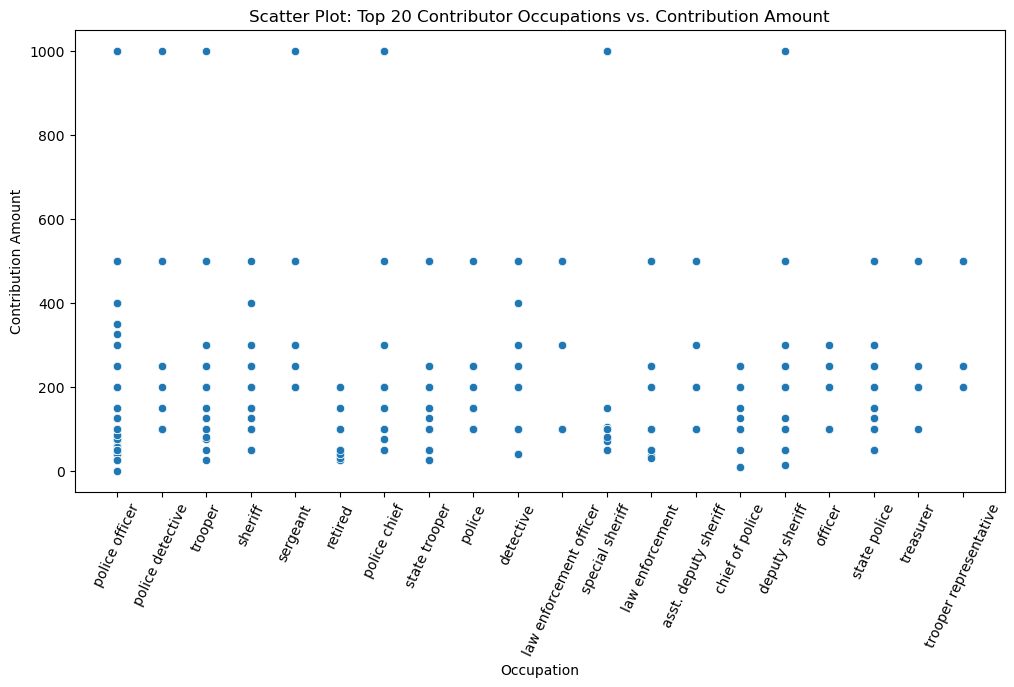

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the top 20 occupations
top_20_occupations_list = top_20_occupations_df['Occupation'].tolist()
df_top_20_occupations = df[df['Occupation'].isin(top_20_occupations_list)]

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_20_occupations, x='Occupation', y='Amount')
plt.xticks(rotation=65)  # Rotate x-axis labels by 45 degrees
plt.xlabel('Occupation')
plt.ylabel('Contribution Amount')
plt.title('Scatter Plot: Top 20 Contributor Occupations vs. Contribution Amount')

# Show the plot
plt.show()


#### Extracting the year and drawing a line chart to see the yearly contribution trend

In [52]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create a new column 'Year' to store the year value from 'Date'
df['Year'] = df['Date'].dt.year

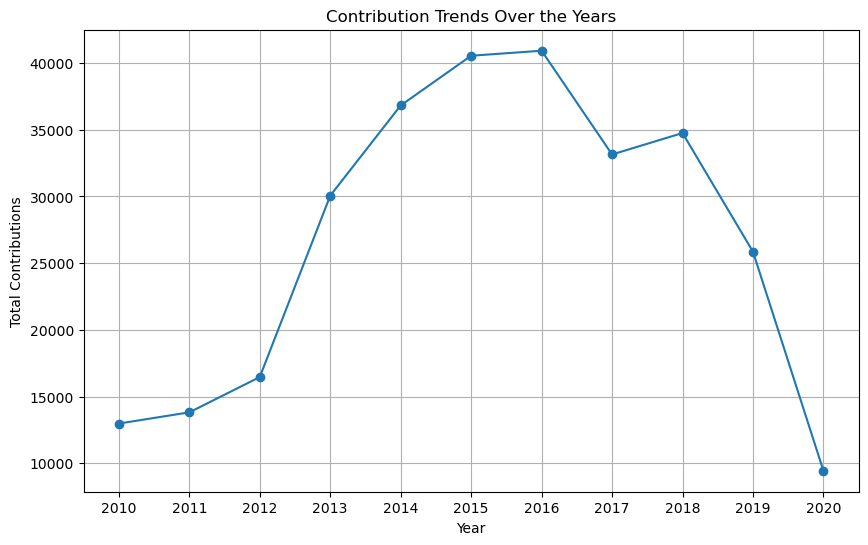

In [53]:
import matplotlib.pyplot as plt

# Group the data by 'Year' and sum the 'Amount' for each year
yearly_contributions = df.groupby('Year')['Amount'].sum()

# Get the unique years
unique_years = yearly_contributions.index

# Plot a line chart to visualize the contribution trends over the years
yearly_contributions.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Contribution Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Contributions')
plt.grid(True)
plt.xticks(unique_years)

plt.show()


# ACTIVE SENATOR

## Exploring the Active_Senator_Contributions 2010-2020.csv

In [54]:
import pandas as pd

# Provide the file path
file_path = 'Active_Senator_Contributions 2010-2020.csv'

# Read the Excel file into a Pandas DataFrame
df = pd.read_csv(file_path)
df.head()

,Address,Amount,CPF ID,City,City Names,Contributor,County Names,Date,Datetime,Employer,...,Record Type Description,Record Type ID,Source Description,State,Tender Type Description,Tender Type ID,UUID,Zip,Zip Codes,Matching Names
0,306 Lincoln St,200.0,16321,Revere,Revere,"DECARLO, Christopher",Suffolk County,1/2/2016,2016-01-02,LYNNFIELD,...,Individual,201,2016 Pre-primary Report (Special) (ND),MA,NaN,0,8a7814be-54e0-528f-b49c-40086ad6c955,02151,2151.0,Joseph Boncore
1,394 Shirley St,200.0,16321,Winthrop,Winthrop,"IMPEMBA, Robert",Suffolk County,1/27/2016,2016-01-27,REVERE,...,Individual,201,2016 Pre-primary Report (Special) (ND),MA,NaN,0,7b98214b-8e97-5392-902a-8055a915c444,02152,2152.0,Joseph Boncore
2,"5615 Netherland Ave., #4c",100.0,16321,Bronx,NaN,"Wynne, Conor",NaN,3/22/2016,2016-03-22,New York City Police Department,...,Individual,201,2016 Pre-primary Report (Special) (ND),NY,NaN,0,07163b6e-3780-5fdf-a7b1-547a1f0cc885,10471,NaN,Joseph Boncore
3,5 Cedar St.,125.0,16321,Everett,Everett,"Internicola, Joseph",Middlesex County,6/28/2016,2016-06-28,City of Everett,...,Individual,201,2016 Pre-primary Report (ND),MA,NaN,0,c5083b6d-a22f-51cc-937e-ffa6f042abe5,02149,2149.0,Joseph Boncore
4,24 Forest Dr.,200.0,16321,Holden,Holden,"Daly, Andrew",Worcester County,6/29/2016,2016-06-29,Commonwealth of Massachusetts,...,Individual,201,2016 Pre-primary Report (ND),MA,NaN,0,39bc94fc-87ca-549b-b42b-c8ec2c4ff0e3,01520,1520.0,Joseph Boncore


#### Finding the top 10 recipients based on how much money they have recieved

In [55]:
# Group the data by 'Matching Names' and sum the 'Amount' for each name
name_recipients = df.groupby('Matching Names')['Amount'].sum()
top_10_names_rec = name_recipients.sort_values(ascending=False).head(10)

# Display the top 10 names who have received the most contributions
print("Top 10 names who have received the most contributions:\n",top_10_names_rec)

Top 10 names who have received the most contributions:
 Matching Names
Michael Moore        163730.0
Stanley Rosenberg    100800.0
Karen Spilka          72800.0
Michael Rodrigues     46830.0
Walter Timilty        29925.0
Michael Rush          24920.0
Bruce Tarr            22750.0
Patrick O'Connor      17850.0
John Velis             8750.0
Marc Pacheco           8400.0
Name: Amount, dtype: float64


#### Finding the top 10 contributors based on how much money they have contributed

In [56]:
name_contributors = df.groupby('Contributor')['Amount'].sum()
top_10_names_con = name_contributors.sort_values(ascending=False).head(10)

# Display the top 10 names who have the most contributions
print("Top 10 names who have the most contributions:\n",top_10_names_con)

Top 10 names who have the most contributions:
 Contributor
Hunter, Edward    34650.0
Noonan, Robert    25200.0
Pullman, Dana     15725.0
Dore, Maurice     15155.0
Brenner, Karl     14000.0
Crowley, Paul     12250.0
Machado, James    11375.0
Lynch, Mark S     10500.0
daly, Andrew      10500.0
Daly, Andrew      10350.0
Name: Amount, dtype: float64


#### Finding the occupation of the top 10 contributors

In [59]:
top_10_contributors = top_10_names_con.index

# Create a new DataFrame containing only the top 10 contributors
top_10_contributors_df = df[df['Contributor'].isin(top_10_contributors)][['Contributor', 'Occupation']]
top_10_contributors_df = top_10_contributors_df.drop_duplicates(subset='Contributor')

# Display the top 10 contributors and their respective occupations
print(top_10_contributors_df)

        Contributor            Occupation
4      Daly, Andrew  State Police Trooper
5    Hunter, Edward  State Police Trooper
6     Pullman, Dana  State Police Trooper
288  Machado, James        Police Officer
344  Noonan, Robert        sheriff's dept
367   Crowley, Paul               Trooper
373   Brenner, Karl               Trooper
413   Dore, Maurice        Police Officer
472   Lynch, Mark S               Trooper
519    daly, Andrew               Trooper


#### Top 20 occupations based on amount contributed

In [60]:
df['Occupation'] = df['Occupation'].str.lower()

# Group the data by 'Occupation' and sum the 'Amount' for each occupation
occupation_contributions = df.groupby('Occupation')['Amount'].sum()

# Sort the resulting series and take the top 20
top_20_occupations = occupation_contributions.sort_values(ascending=False).head(20)

top_20_occupations_df = top_20_occupations.reset_index()
top_20_occupations_df.columns = ['Occupation', 'Total Contribution']

# Display the top 20 occupations and their respective contribution totals
print(top_20_occupations_df)


                      Occupation  Total Contribution
0                        trooper            127350.0
1                 police officer            123459.0
2                  state trooper             83400.0
3                 sheriff's dept             25200.0
4           environmental police             19705.0
5           state police officer             18050.0
6                   state police             15525.0
7                        retired             14700.0
8                 deputy sheriff             13975.0
9                   police chief             10575.0
10                       sheriff             10550.0
11          lieutenant/detective              7000.0
12       deputy sheriff franklin              6300.0
13  environmental police officer              5750.0
14               police officer               5550.0
15                      seargent              5250.0
16               chief of police              4825.0
17                     detective              

#### Create a scatter plot for the top 20 contributions vs. contribution amount

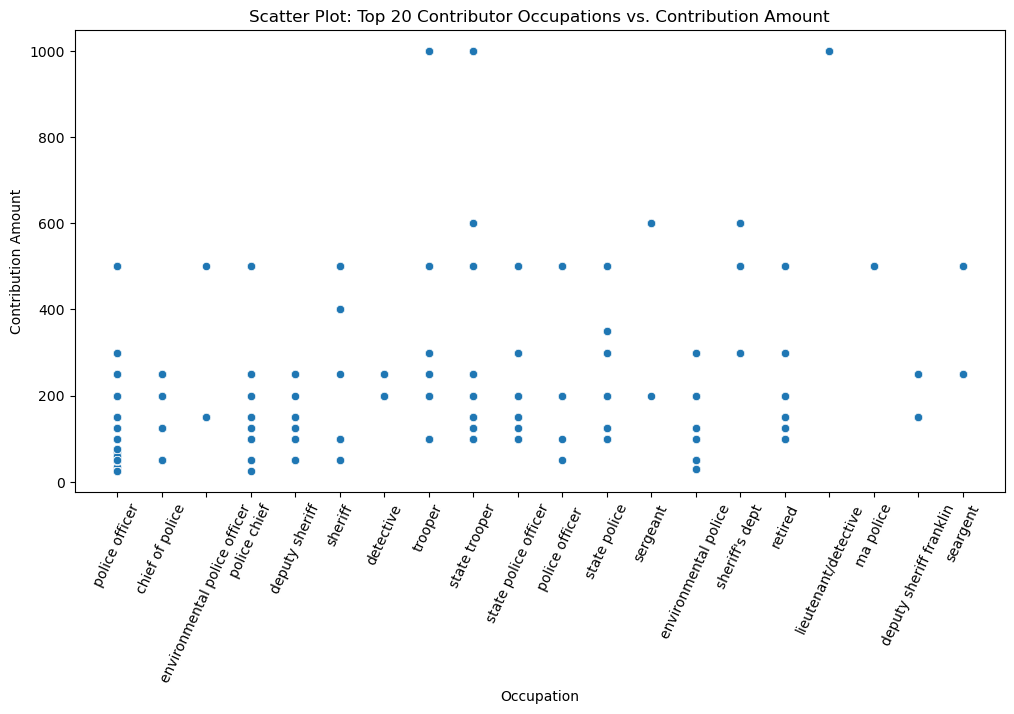

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the top 20 occupations
top_20_occupations_list = top_20_occupations_df['Occupation'].tolist()
df_top_20_occupations = df[df['Occupation'].isin(top_20_occupations_list)]

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_20_occupations, x='Occupation', y='Amount')
plt.xticks(rotation=65)  # Rotate x-axis labels by 45 degrees
plt.xlabel('Occupation')
plt.ylabel('Contribution Amount')
plt.title('Scatter Plot: Top 20 Contributor Occupations vs. Contribution Amount')

# Show the plot
plt.show()


#### Extracting the year and drawing a line chart to see the yearly contribution trend

In [62]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create a new column 'Year' to store the year value from 'Date'
df['Year'] = df['Date'].dt.year

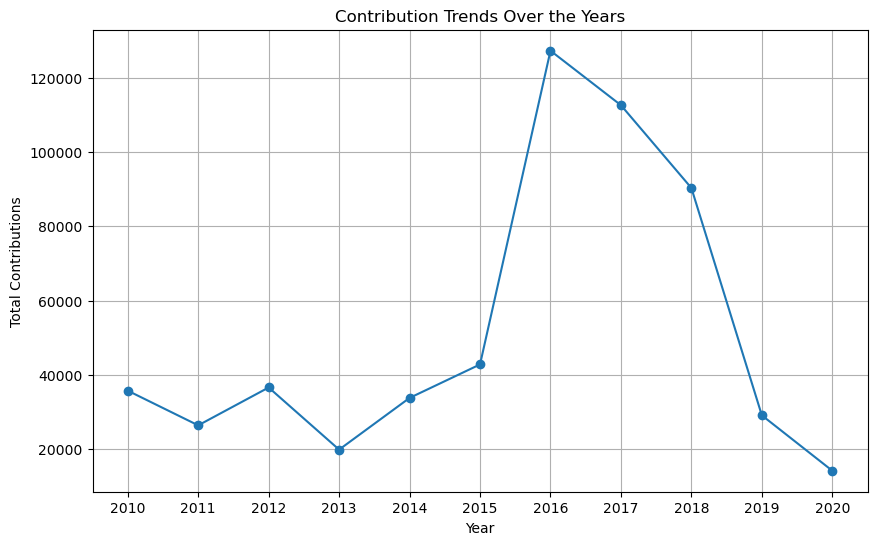

In [63]:
import matplotlib.pyplot as plt

# Group the data by 'Year' and sum the 'Amount' for each year
yearly_contributions = df.groupby('Year')['Amount'].sum()

# Get the unique years
unique_years = yearly_contributions.index

# Plot a line chart to visualize the contribution trends over the years
yearly_contributions.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Contribution Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Contributions')
plt.grid(True)
plt.xticks(unique_years)

plt.show()
